In [1]:
import tensorflow as st
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras import Sequential
import cv2

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar100.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[0]

array([19])

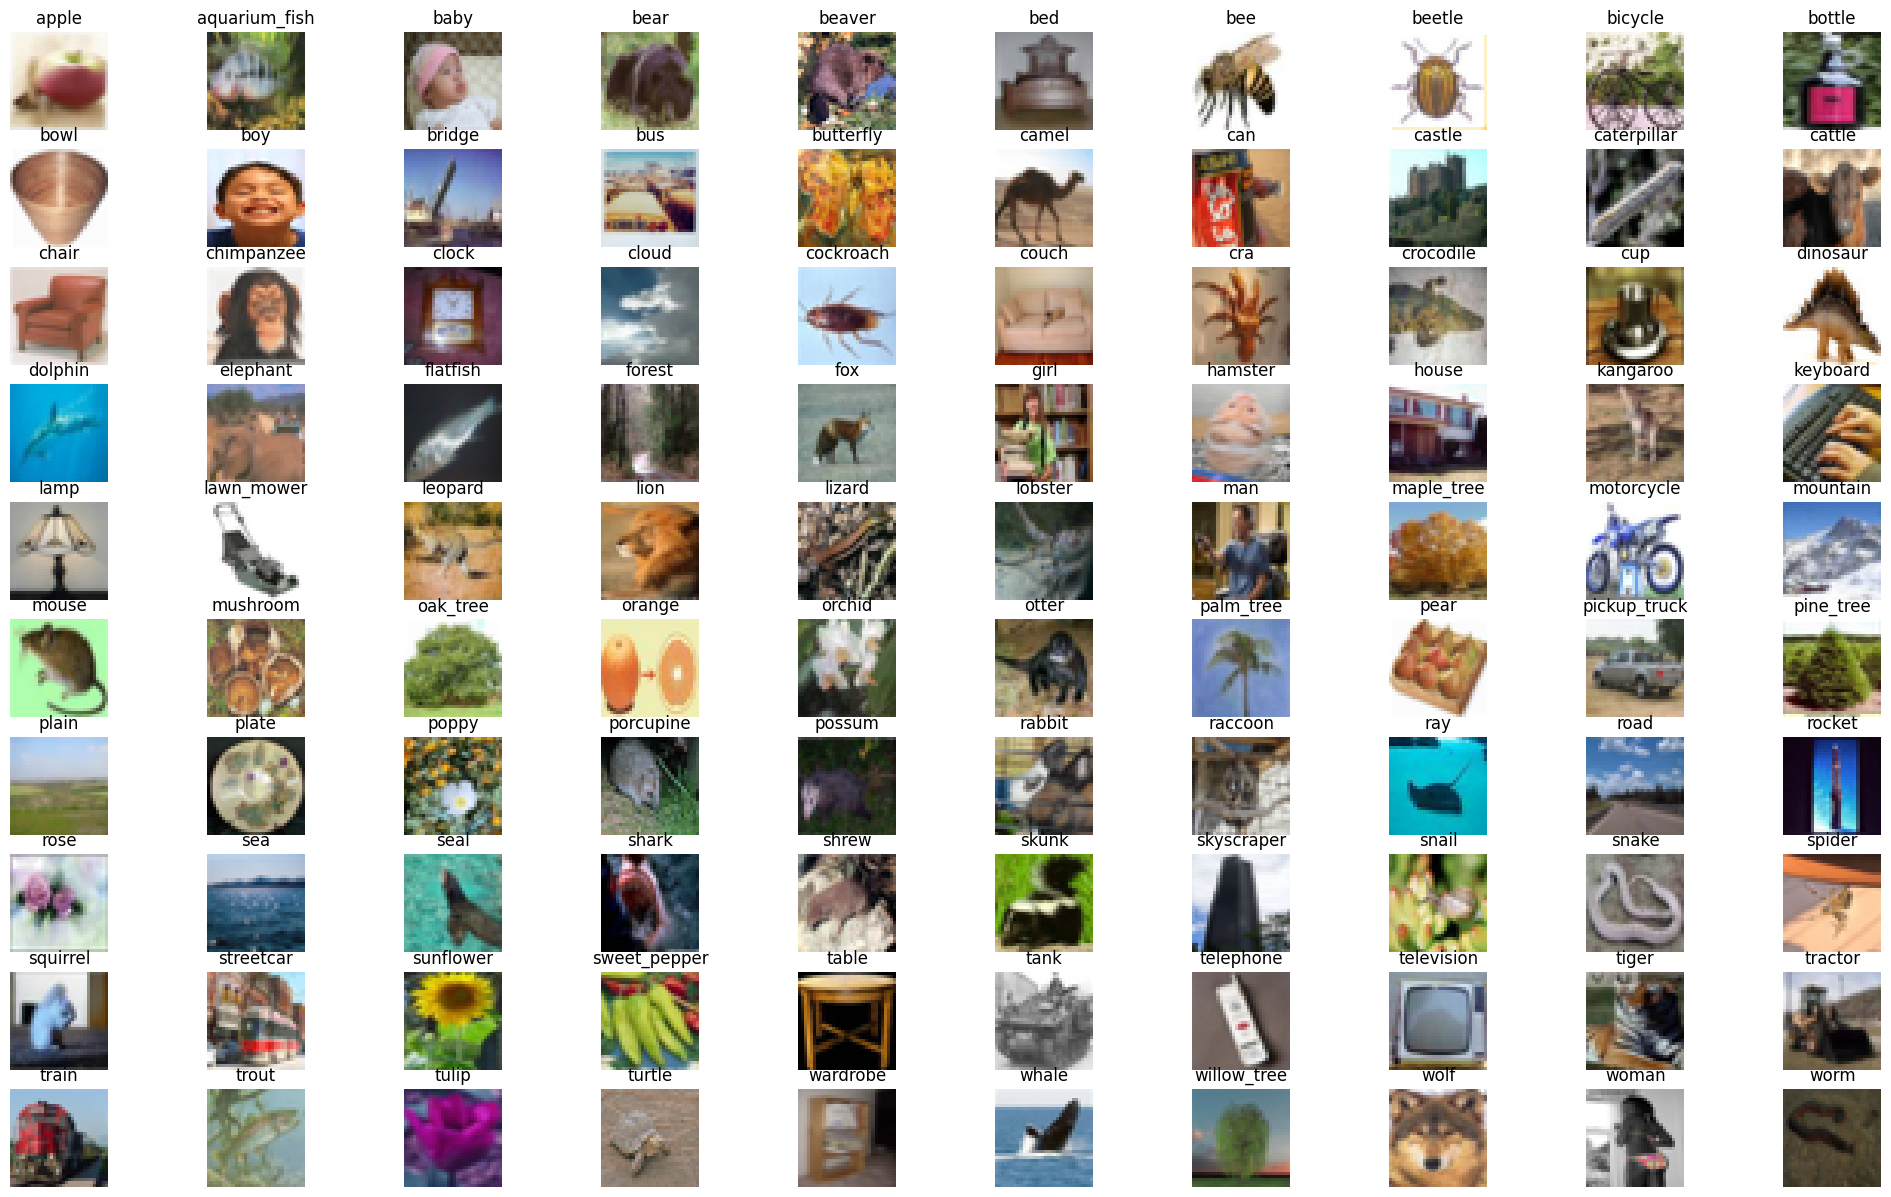

In [42]:
class_names = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','cra','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']
plt.figure(figsize=(25,15))
j = 0
for i in range(len(x_train)):
    if j == y_train[i]:
        plt.subplot(10,10,j+1)
        plt.axis('off')
        plt.imshow(x_train[i],cmap='gray')
        plt.title(class_names[j])
        # for_save = cv2.cvtColor(x_train[i],cv2.COLOR_BGR2GRAY)
        for_save = cv2.resize(x_train[i],(200,200))
        plt.imsave('class_images/' + f'{class_names[j]}'+ '.png',for_save)
        j += 1

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [26]:
model = Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(2000,activation='relu'),
    keras.layers.Dense(1500,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(100,activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,
          validation_split=0.33,
          epochs = 10,
          batch_size=128)

Epoch 1/10
262/262 [==============================] - 52s 193ms/step - loss: 4.2011 - accuracy: 0.0420 - val_loss: 3.8818 - val_accuracy: 0.0744
Epoch 2/10
262/262 [==============================] - 48s 184ms/step - loss: 3.7312 - accuracy: 0.1013 - val_loss: 3.5763 - val_accuracy: 0.1321
Epoch 3/10
262/262 [==============================] - 48s 185ms/step - loss: 3.4121 - accuracy: 0.1570 - val_loss: 3.2907 - val_accuracy: 0.1858
Epoch 4/10
262/262 [==============================] - 45s 173ms/step - loss: 3.1007 - accuracy: 0.2185 - val_loss: 3.2089 - val_accuracy: 0.2117
Epoch 5/10
262/262 [==============================] - 48s 185ms/step - loss: 2.8432 - accuracy: 0.2713 - val_loss: 3.0033 - val_accuracy: 0.2598
Epoch 6/10
262/262 [==============================] - 47s 181ms/step - loss: 2.5753 - accuracy: 0.3251 - val_loss: 2.9014 - val_accuracy: 0.2826
Epoch 7/10
262/262 [==============================] - 48s 184ms/step - loss: 2.3067 - accuracy: 0.3810 - val_loss: 2.8268 - val_ac

In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 3.0680 - accuracy: 0.3445


[3.067981719970703, 0.34450000524520874]

In [29]:
model.save('model/model.h5')

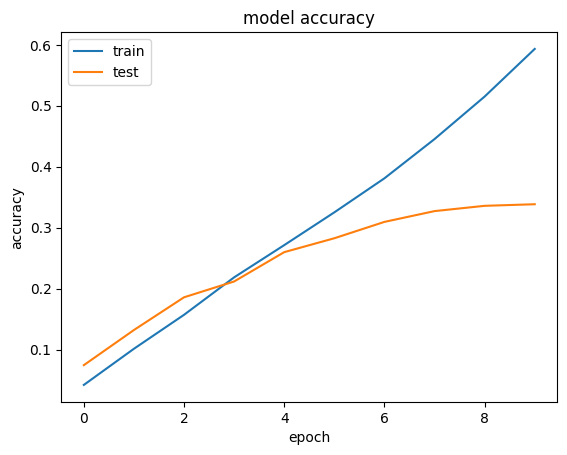

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

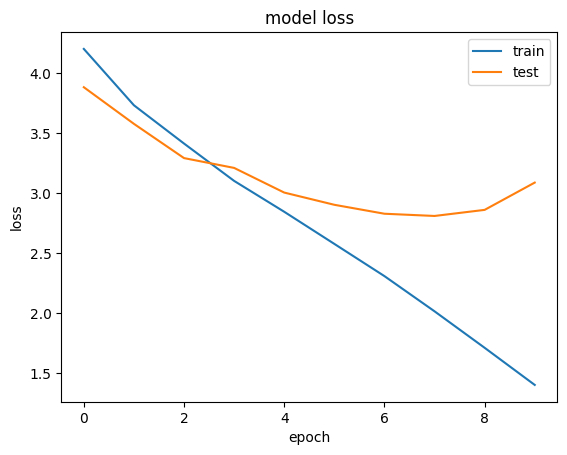

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()